In [1]:
import pandas as pd
import numpy as np
import datetime
from scipy import sparse
# word embedding 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import string
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import gensim 
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
# visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Reddit Data API 

### Submission data (566951 submissions)

In [47]:
import requests
import json
import time
import datetime
import csv

def getData(query, after=None, before=None):
    url = 'https://api.pushshift.io/reddit/search/submission/?title='+str(query)+'&size=1000&after='+str(after)+'&before='+str(before)
    print(url)
    r = requests.get(url)
    data = json.loads(r.text)
    return data['data']

In [48]:
# collect Postid, author, post date, score, number of comments, permalink (subreddit name), and flair
def collectSubData(data):
    subData = list() #list to store data points
    title = data['title']
    url = data['url']
    try:
        flair = data['link_flair_text']
    except KeyError:
        flair = "NaN"    
    author = data['author']
    sub_id = data['id']
    score = data['score']
    created = datetime.datetime.fromtimestamp(data['created_utc']) 
    numComms = data['num_comments']
    permalink = data['permalink']
    
    subData.append((sub_id,title,url,author,score,created,numComms,permalink,flair))
    subStats[sub_id] = subData

In [53]:
#before and after dates
before = "1586649600" #April 12nd  
after ="1583020800" #March 1st
query = "covid"
subCount = 0
subStats = {}

data = getData(query, after, before)
# Will run until all posts have been gathered from the 'after' date up until before date
while len(data) > 0:
    for submission in data:
        collectSubData(submission)
        subCount+=1
    # Call getData() with the created date of the last submission
    print(len(data))
    print(str(datetime.datetime.fromtimestamp(data[-1]['created_utc'])))
    after = data[-1]['created_utc']
    data = getData(query, after, before)
    
print(len(data))

https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1583020800&before=1586649600
1000
2020-03-01 09:49:25
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1583084965&before=1586649600
1000
2020-03-01 23:12:20
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1583133140&before=1586649600
1000
2020-03-02 10:44:08
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1583174648&before=1586649600
1000
2020-03-02 21:52:09
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1583214729&before=1586649600
1000
2020-03-03 08:19:40
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1583252380&before=1586649600
1000
2020-03-03 17:29:46
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1583285386&before=1586649600
1000
2020-03-04 05:48:14
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1

1000
2020-03-12 23:55:33
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1584082533&before=1586649600
1000
2020-03-13 02:07:52
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1584090472&before=1586649600
1000
2020-03-13 04:07:25
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1584097645&before=1586649600
1000
2020-03-13 05:53:13
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1584103993&before=1586649600
1000
2020-03-13 07:22:08
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1584109328&before=1586649600
1000
2020-03-13 08:38:33
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1584113913&before=1586649600
1000
2020-03-13 09:45:04
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1584117904&before=1586649600
1000
2020-03-13 11:01:20
https://api.pushshift.io/reddit/search/submi

1000
2020-03-17 00:48:40
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1584431320&before=1586649600
1000
2020-03-17 02:55:36
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1584438936&before=1586649600
1000
2020-03-17 04:42:03
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1584445323&before=1586649600
1000
2020-03-17 06:17:20
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1584451040&before=1586649600
1000
2020-03-17 07:38:04
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1584455884&before=1586649600
1000
2020-03-17 08:50:56
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1584460256&before=1586649600
1000
2020-03-17 09:57:23
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1584464243&before=1586649600
1000
2020-03-17 11:08:25
https://api.pushshift.io/reddit/search/submi

1000
2020-03-20 08:53:27
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1584719607&before=1586649600
1000
2020-03-20 10:02:00
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1584723720&before=1586649600
1000
2020-03-20 10:59:14
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1584727154&before=1586649600
1000
2020-03-20 12:02:43
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1584730963&before=1586649600
1000
2020-03-20 13:02:24
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1584734544&before=1586649600
1000
2020-03-20 14:04:52
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1584738292&before=1586649600
1000
2020-03-20 15:11:09
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1584742269&before=1586649600
1000
2020-03-20 16:17:51
https://api.pushshift.io/reddit/search/submi

1000
2020-03-23 23:15:00
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1585030500&before=1586649600
1000
2020-03-24 00:51:34
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1585036294&before=1586649600
1000
2020-03-24 02:21:09
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1585041669&before=1586649600
1000
2020-03-24 04:03:14
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1585047794&before=1586649600
1000
2020-03-24 05:18:23
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1585052303&before=1586649600
1000
2020-03-24 06:26:34
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1585056394&before=1586649600
1000
2020-03-24 07:29:30
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1585060170&before=1586649600
1000
2020-03-24 08:32:55
https://api.pushshift.io/reddit/search/submi

1000
2020-03-27 03:39:43
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1585305583&before=1586649600
1000
2020-03-27 04:42:23
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1585309343&before=1586649600
1000
2020-03-27 05:48:11
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1585313291&before=1586649600
1000
2020-03-27 06:48:44
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1585316924&before=1586649600
1000
2020-03-27 07:44:27
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1585320267&before=1586649600
1000
2020-03-27 08:47:05
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1585324025&before=1586649600
1000
2020-03-27 09:41:27
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1585327287&before=1586649600
1000
2020-03-27 10:38:24
https://api.pushshift.io/reddit/search/submi

1000
2020-03-30 13:58:16
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1585601896&before=1586649600
1000
2020-03-30 15:03:42
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1585605822&before=1586649600
1000
2020-03-30 16:19:20
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1585610360&before=1586649600
1000
2020-03-30 17:38:08
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1585615088&before=1586649600
1000
2020-03-30 18:51:59
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1585619519&before=1586649600
1000
2020-03-30 20:24:33
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1585625073&before=1586649600
1000
2020-03-30 22:03:24
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1585631004&before=1586649600
1000
2020-03-30 23:39:57
https://api.pushshift.io/reddit/search/submi

1000
2020-04-03 02:18:18
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1585905498&before=1586649600
1000
2020-04-03 03:56:35
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1585911395&before=1586649600
1000
2020-04-03 05:25:45
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1585916745&before=1586649600
1000
2020-04-03 06:46:10
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1585921570&before=1586649600
1000
2020-04-03 07:56:39
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1585925799&before=1586649600
1000
2020-04-03 09:05:14
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1585929914&before=1586649600
1000
2020-04-03 10:05:27
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1585933527&before=1586649600
1000
2020-04-03 11:07:42
https://api.pushshift.io/reddit/search/submi

1000
2020-04-07 02:20:03
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1586251203&before=1586649600
1000
2020-04-07 04:01:48
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1586257308&before=1586649600
1000
2020-04-07 05:35:28
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1586262928&before=1586649600
1000
2020-04-07 06:51:20
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1586267480&before=1586649600
1000
2020-04-07 08:11:11
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1586272271&before=1586649600
1000
2020-04-07 09:25:09
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1586276709&before=1586649600
1000
2020-04-07 10:41:58
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1586281318&before=1586649600
1000
2020-04-07 11:54:09
https://api.pushshift.io/reddit/search/submi

1000
2020-04-11 02:09:38
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1586596178&before=1586649600
1000
2020-04-11 03:41:08
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1586601668&before=1586649600
1000
2020-04-11 05:21:56
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1586607716&before=1586649600
1000
2020-04-11 07:08:21
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1586614101&before=1586649600
1000
2020-04-11 08:37:20
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1586619440&before=1586649600
1000
2020-04-11 10:09:00
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1586624940&before=1586649600
1000
2020-04-11 11:41:05
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&after=1586630465&before=1586649600
1000
2020-04-11 13:20:54
https://api.pushshift.io/reddit/search/submi

In [99]:
with open('redsub.csv', 'w', newline='', encoding='utf-8') as file: 
    reddit_submission = csv.writer(file, delimiter=',')
    headers = ["PostID","Title","Url","Author","Score","PublishDate","TotalComments","Permalink","Flair"]
    reddit_submission.writerow(headers)
    for sub in subStats:
        reddit_submission.writerow(subStats[sub][0])

reddit_submission

In [86]:
reddit_submission = pd.read_csv("redsub.csv")
reddit_submission['PublishDate'] = pd.to_datetime(reddit_submission['PublishDate'])
reddit_submission['Month'] = reddit_submission['PublishDate'].dt.month
reddit_submission['Hour'] = reddit_submission['PublishDate'].dt.hour
reddit_submission['Weekday'] = reddit_submission['PublishDate'].dt.weekday

reddit_submission.head()

,PostID,Title,Url,Author,Score,PublishDate,TotalComments,Permalink,Flair,Month,Hour,Weekday
0,fblil3,First COVID-19 death in the U.S. happens in Washington state,https://www.nbcnews.com/news/us-news/1st-coronavirus-death-u-s-officials-say...,freshjimbo,1,2020-02-29 16:00:11,1,/r/u_freshjimbo/comments/fblil3/first_covid19_death_in_the_us_happens_in/,NaN,2,16,5
1,fbljfc,"Washington state sees 1st COVID-19 death in US, declares emergency",https://q13fox.com/2020/02/29/washington-gov-jay-inslee-declares-state-of-em...,UrsulaVonStargazer,1,2020-02-29 16:01:53,5,/r/COVID__19/comments/fbljfc/washington_state_sees_1st_covid19_death_in_us/,NaN,2,16,5
2,fblk40,COVID-19: How I'm investing through this uncertainty,https://www.reddit.com/r/singaporefi/comments/fblk40/covid19_how_im_investin...,firepathlion,1,2020-02-29 16:03:22,12,/r/singaporefi/comments/fblk40/covid19_how_im_investing_through_this_uncerta...,NaN,2,16,5
3,fbll8p,COVID-19 Versus the Market,https://www.reddit.com/r/StockMarket/comments/fbll8p/covid19_versus_the_market/,ThorsInvestment,1,2020-02-29 16:05:58,0,/r/StockMarket/comments/fbll8p/covid19_versus_the_market/,NaN,2,16,5
4,fbllq5,How does COVID-19 affect students on rotation?,https://www.reddit.com/r/medicine/comments/fbllq5/how_does_covid19_affect_st...,Playboipapi,1,2020-02-29 16:07:01,0,/r/medicine/comments/fbllq5/how_does_covid19_affect_students_on_rotation/,NaN,2,16,5


***get Subreddit and see discussion distribution in each Subreddit***

In [98]:
# extract subreddit names
import re

def getSubreddit(string):
    subreddit = re.sub(r'\/r\/(\w+)\/.*', r'\1', string)
    return subreddit

reddit_submission["Subreddit"] = reddit_submission["Permalink"].apply(getSubreddit)
reddit_submission["Subreddit"]

0            u_freshjimbo
1               COVID__19
2             singaporefi
3             StockMarket
4                medicine
               ...       
566946        Coronavirus
566947               Ohio
566948    dataisbeautiful
566949    TalkativePeople
566950        boogalorian
Name: Subreddit, Length: 566951, dtype: object

In [101]:
# focus on US covid cases so delect u_toronto_news
a = reddit_submission[reddit_submission["Subreddit"]!="u_toronto_news"]
a['Subreddit'].value_counts()

Coronavirus              21770
AskReddit                21024
TalkativePeople          18951
AutoNewspaper             7499
DDnews                    7340
                         ...  
qualitydomains               1
WhereAreAllTheGoodMen        1
NinjaPromo                   1
MoveToIreland                1
AnxietyBlogs                 1
Name: Subreddit, Length: 30487, dtype: int64

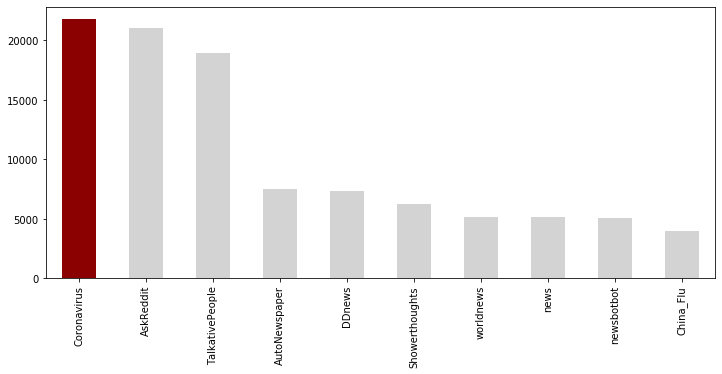

In [136]:
# Findings: Coronavirus is the largest Subreddit where people discuss covid update news 
plt.figure(figsize=(12,5))
colors = ['lightgrey' if (x < max(a['Subreddit'].value_counts())) else 'darkred' for x in a['Subreddit'].value_counts().head(10) ]
a['Subreddit'].value_counts().head(10).sort_values(ascending = False).plot(kind="bar", color=colors)

### Submission - Coronavirus subreddit data

In [54]:
def getData(query, after=None, before=None):
    url = 'https://api.pushshift.io/reddit/search/submission/?title='+str(query)+'&size=1000&subreddit=Coronavirus&after='+str(after)+'&before='+str(before)
    print(url)
    r = requests.get(url)
    data = json.loads(r.text)
    return data['data']

In [55]:
def collectSubData(data):
    subData = list() #list to store data points
    title = data['title']
    url = data['url']
    try:
        flair = data['link_flair_text']
    except KeyError:
        flair = "NaN"    
    author = data['author']
    sub_id = data['id']
    score = data['score']
    created = datetime.datetime.fromtimestamp(data['created_utc']) 
    numComms = data['num_comments']
    permalink = data['permalink']
    
    subData.append((sub_id,title,url,author,score,created,numComms,permalink,flair))
    subStats[sub_id] = subData

In [62]:
#before and after dates
before = "1586649600" #April 11st  
after ="1583884800"
query = "covid"
subCount = 0
subStats = {}

data = getData(query, after, before)
# Will run until all posts have been gathered 
# from the 'after' date up until before date
while len(data) > 0:
    for submission in data:
        collectSubData(submission)
        subCount+=1
    # Calls getPushshiftData() with the created date of the last submission
    print(len(data))
    print(str(datetime.datetime.fromtimestamp(data[-1]['created_utc'])))
    after = data[-1]['created_utc']
    data = getData(query, after, before)
    
print(len(data))

https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&subreddit=Coronavirus&after=1583884800&before=1586649600
1000
2020-03-12 08:11:28
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&subreddit=Coronavirus&after=1584025888&before=1586649600
1000
2020-03-13 13:41:04
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&subreddit=Coronavirus&after=1584132064&before=1586649600
1000
2020-03-15 08:04:43
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&subreddit=Coronavirus&after=1584284683&before=1586649600
1000
2020-03-16 17:07:51
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&subreddit=Coronavirus&after=1584403671&before=1586649600
1000
2020-03-18 09:23:51
https://api.pushshift.io/reddit/search/submission/?title=covid&size=1000&subreddit=Coronavirus&after=1584548631&before=1586649600
1000
2020-03-19 15:38:23
https://api.pushshift.io/reddit/search/submission/?title=covid&size=10

In [63]:
with open('subred_covid_submis.csv', 'w', newline='', encoding='utf-8') as file: 
    reddit_submission = csv.writer(file, delimiter=',')
    headers = ["PostID","Title","Url","Author","Score","PublishDate","TotalComments","Permalink","Flair"]
    reddit_submission.writerow(headers)
    for sub in subStats:
        reddit_submission.writerow(subStats[sub][0])

In [64]:
sub_covid_submiss = pd.read_csv("subred_covid_submis.csv")
sub_covid_submiss['PublishDate'] = pd.to_datetime(sub_covid_submiss['PublishDate'])
sub_covid_submiss['Month'] = sub_covid_submiss['PublishDate'].dt.month
sub_covid_submiss['Hour'] = sub_covid_submiss['PublishDate'].dt.hour
sub_covid_submiss['Weekday'] = sub_covid_submiss['PublishDate'].dt.weekday

sub_covid_submiss.head()

,PostID,Title,Url,Author,Score,PublishDate,TotalComments,Permalink,Flair,Month,Hour,Weekday
0,fgnw86,Waffle House Employee Tests Positive for COVID-19 in North Atlanta,https://www.wsbtv.com/news/local/cherokee-county/metro-atlanta-waffle-house-...,CurvyParadox,1,2020-03-10 17:04:58,42,/r/Coronavirus/comments/fgnw86/waffle_house_employee_tests_positive_for_covi...,USA,3,17,1
1,fgnyiq,5th person in New Hampshire tests positive for COVID-19,https://youtu.be/xdyFcAwrbeY,RouletteRog,1,2020-03-10 17:09:43,0,/r/Coronavirus/comments/fgnyiq/5th_person_in_new_hampshire_tests_positive_for/,USA,3,17,1
2,fgnyiy,"My college, SDSU, will be transitioning fully online due to COVID-19 concerns.",https://www.cbs8.com/article/news/health/coronavirus/san-diego-state-univers...,FalloutShelter,1,2020-03-10 17:09:44,11,/r/Coronavirus/comments/fgnyiy/my_college_sdsu_will_be_transitioning_fully/,USA,3,17,1
3,fgnyp4,4 new COVID-19 cases reported in Hyogo prefecture. Including a Physician in ...,https://www3.nhk.or.jp/news/html/20200310/k10012324111000.html?utm_int=word_...,GlobalTravelR,1,2020-03-10 17:10:05,7,/r/Coronavirus/comments/fgnyp4/4_new_covid19_cases_reported_in_hyogo_prefect...,Central &amp; East Asia,3,17,1
4,fgo0ek,Guidance from VDH in case COVID-19 is detected in a community: Consider clas...,http://www.vdh.virginia.gov/content/uploads/sites/13/2020/03/VDH-Childcare-K...,capdagde1,1,2020-03-10 17:13:37,26,/r/Coronavirus/comments/fgo0ek/guidance_from_vdh_in_case_covid19_is_detected...,USA,3,17,1


In [65]:
len(sub_covid_submiss)

18965

### Comment data (1,069,748 comments)

In [70]:
def getComment(query, after=None, before=None):
    url = 'https://api.pushshift.io/reddit/search/comment/?q='+str(query)+'&size=1000&after='+str(after)+'&before='+str(before)
    print(url)
    r = requests.get(url)
    comments = json.loads(r.text)
    return comments['data']

# set up data to be collected 
def collectComment(data):
    commentData = []
    author = data['author']
    text = data['body'] 
    com_id = data['id']
    score = data['score']
    created = datetime.datetime.fromtimestamp(data['created_utc']) 
    subreddit = data['subreddit']
    permalink = data['permalink']
    
    commentData.append([com_id,author,text,score,created,subreddit,permalink])
    comStats[com_id] = commentData

In [71]:
#before and after dates
before = "1586649600" #April 12nd  
after ="1583020800" #March 1st
query = "covid"
count = 0
comStats = {}

comments = getComment(query, after, before)

while len(comments) > 0:
    for i in comments:
        collectComment(i)
        count+=1
    print(len(comments))
    print(str(datetime.datetime.fromtimestamp(comments[-1]['created_utc'])))
    after = comments[-1]['created_utc']
    comments = getComment(query, after, before)
    
len(comStats)

https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1583020800&before=1586649600
1000
2020-02-29 20:18:27
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1583036307&before=1586649600
1000
2020-03-01 03:39:49
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1583062789&before=1586649600
1000
2020-03-01 08:42:38
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1583080958&before=1586649600
1000
2020-03-01 12:40:36
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1583095236&before=1586649600
1000
2020-03-01 17:16:59
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1583111819&before=1586649600
1000
2020-03-01 21:36:37
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1583127397&before=1586649600
1000
2020-03-02 03:37:03
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1583149023&before=1586649600
1000
2020-03-02 0

1000
2020-03-09 16:04:09
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1583795049&before=1586649600
1000
2020-03-09 17:39:45
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1583800785&before=1586649600
1000
2020-03-09 19:18:11
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1583806691&before=1586649600
1000
2020-03-09 21:04:14
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1583813054&before=1586649600
1000
2020-03-09 23:31:14
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1583821874&before=1586649600
1000
2020-03-10 02:36:55
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1583833015&before=1586649600
1000
2020-03-10 05:25:41
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1583843141&before=1586649600
1000
2020-03-10 07:07:48
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1583849268&before=158

1000
2020-03-12 21:54:34
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584075274&before=1586649600
1000
2020-03-12 22:55:20
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584078920&before=1586649600
1000
2020-03-13 00:10:31
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584083431&before=1586649600
1000
2020-03-13 01:32:19
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584088339&before=1586649600
1000
2020-03-13 02:59:56
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584093596&before=1586649600
1000
2020-03-13 04:15:25
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584098125&before=1586649600
1000
2020-03-13 05:15:53
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584101753&before=1586649600
1000
2020-03-13 06:08:12
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584104892&before=158

1000
2020-03-15 12:38:10
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584301090&before=1586649600
1000
2020-03-15 13:24:18
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584303858&before=1586649600
1000
2020-03-15 14:07:41
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584306461&before=1586649600
1000
2020-03-15 14:58:57
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584309537&before=1586649600
1000
2020-03-15 15:44:14
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584312254&before=1586649600
1000
2020-03-15 16:30:51
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584315051&before=1586649600
1000
2020-03-15 17:17:11
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584317831&before=1586649600
1000
2020-03-15 18:01:26
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584320486&before=158

1000
2020-03-17 17:51:20
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584492680&before=1586649600
1000
2020-03-17 18:32:06
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584495126&before=1586649600
1000
2020-03-17 19:14:31
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584497671&before=1586649600
1000
2020-03-17 19:55:49
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584500149&before=1586649600
1000
2020-03-17 20:36:22
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584502582&before=1586649600
1000
2020-03-17 21:22:17
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584505337&before=1586649600
1000
2020-03-17 22:11:43
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584508303&before=1586649600
1000
2020-03-17 23:09:02
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584511742&before=158

1000
2020-03-19 17:20:09
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584663609&before=1586649600
1000
2020-03-19 18:02:32
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584666152&before=1586649600
1000
2020-03-19 18:42:32
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584668552&before=1586649600
1000
2020-03-19 19:23:53
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584671033&before=1586649600
1000
2020-03-19 20:04:03
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584673443&before=1586649600
1000
2020-03-19 20:45:48
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584675948&before=1586649600
1000
2020-03-19 21:31:59
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584678719&before=1586649600
1000
2020-03-19 22:24:08
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584681848&before=158

1000
2020-03-21 19:55:32
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584845732&before=1586649600
1000
2020-03-21 20:42:33
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584848553&before=1586649600
1000
2020-03-21 21:30:02
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584851402&before=1586649600
1000
2020-03-21 22:25:30
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584854730&before=1586649600
1000
2020-03-21 23:25:12
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584858312&before=1586649600
1000
2020-03-22 00:35:03
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584862503&before=1586649600
1000
2020-03-22 01:56:18
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584867378&before=1586649600
1000
2020-03-22 03:15:30
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1584872130&before=158

1000
2020-03-23 22:37:55
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585028275&before=1586649600
1000
2020-03-23 23:30:39
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585031439&before=1586649600
1000
2020-03-24 00:31:00
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585035060&before=1586649600
1000
2020-03-24 01:39:18
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585039158&before=1586649600
1000
2020-03-24 02:51:41
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585043501&before=1586649600
1000
2020-03-24 03:59:58
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585047598&before=1586649600
1000
2020-03-24 04:56:57
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585051017&before=1586649600
1000
2020-03-24 05:46:22
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585053982&before=158

1000
2020-03-25 20:28:32
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585193312&before=1586649600
1000
2020-03-25 21:06:28
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585195588&before=1586649600
1000
2020-03-25 21:53:14
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585198394&before=1586649600
1000
2020-03-25 22:46:08
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585201568&before=1586649600
1000
2020-03-25 23:45:48
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585205148&before=1586649600
1000
2020-03-26 01:00:48
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585209648&before=1586649600
1000
2020-03-26 02:19:36
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585214376&before=1586649600
1000
2020-03-26 03:40:03
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585219203&before=158

1000
2020-03-27 17:42:47
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585356167&before=1586649600
1000
2020-03-27 18:22:06
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585358526&before=1586649600
1000
2020-03-27 19:02:15
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585360935&before=1586649600
1000
2020-03-27 19:43:12
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585363392&before=1586649600
1000
2020-03-27 20:27:35
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585366055&before=1586649600
1000
2020-03-27 21:13:14
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585368794&before=1586649600
1000
2020-03-27 22:02:51
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585371771&before=1586649600
1000
2020-03-27 23:01:31
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585375291&before=158

1000
2020-03-29 20:25:17
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585538717&before=1586649600
1000
2020-03-29 21:09:38
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585541378&before=1586649600
1000
2020-03-29 21:57:55
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585544275&before=1586649600
1000
2020-03-29 22:50:11
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585547411&before=1586649600
1000
2020-03-29 23:46:24
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585550784&before=1586649600
1000
2020-03-30 00:59:55
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585555195&before=1586649600
1000
2020-03-30 02:17:47
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585559867&before=1586649600
1000
2020-03-30 03:32:09
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585564329&before=158

1000
2020-03-31 19:34:14
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585708454&before=1586649600
1000
2020-03-31 20:19:08
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585711148&before=1586649600
1000
2020-03-31 20:59:45
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585713585&before=1586649600
1000
2020-03-31 21:47:59
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585716479&before=1586649600
1000
2020-03-31 22:43:07
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585719787&before=1586649600
1000
2020-03-31 23:42:22
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585723342&before=1586649600
1000
2020-04-01 00:49:17
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585727357&before=1586649600
1000
2020-04-01 02:06:00
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585731960&before=158

1000
2020-04-02 18:28:09
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585877289&before=1586649600
1000
2020-04-02 19:06:57
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585879617&before=1586649600
1000
2020-04-02 19:46:42
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585882002&before=1586649600
1000
2020-04-02 20:25:43
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585884343&before=1586649600
1000
2020-04-02 21:09:09
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585886949&before=1586649600
1000
2020-04-02 21:56:01
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585889761&before=1586649600
1000
2020-04-02 22:53:06
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585893186&before=1586649600
1000
2020-04-02 23:57:31
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1585897051&before=158

1000
2020-04-04 20:19:23
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586056763&before=1586649600
1000
2020-04-04 21:05:53
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586059553&before=1586649600
1000
2020-04-04 21:58:38
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586062718&before=1586649600
1000
2020-04-04 22:55:08
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586066108&before=1586649600
1000
2020-04-04 23:54:48
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586069688&before=1586649600
1000
2020-04-05 01:07:35
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586074055&before=1586649600
1000
2020-04-05 02:35:54
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586079354&before=1586649600
1000
2020-04-05 04:04:04
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586084644&before=158

1000
2020-04-06 21:04:36
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586232276&before=1586649600
1000
2020-04-06 21:55:16
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586235316&before=1586649600
1000
2020-04-06 22:49:07
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586238547&before=1586649600
1000
2020-04-06 23:49:06
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586242146&before=1586649600
1000
2020-04-07 01:00:11
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586246411&before=1586649600
1000
2020-04-07 02:20:37
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586251237&before=1586649600
1000
2020-04-07 03:38:50
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586255930&before=1586649600
1000
2020-04-07 04:48:41
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586260121&before=158

1000
2020-04-08 22:05:33
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586408733&before=1586649600
1000
2020-04-08 23:02:01
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586412121&before=1586649600
1000
2020-04-09 00:11:20
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586416280&before=1586649600
1000
2020-04-09 01:29:26
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586420966&before=1586649600
1000
2020-04-09 02:53:01
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586425981&before=1586649600
1000
2020-04-09 04:07:51
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586430471&before=1586649600
1000
2020-04-09 05:07:54
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586434074&before=1586649600
1000
2020-04-09 05:56:41
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586437001&before=158

1000
2020-04-11 06:38:18
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586612298&before=1586649600
1000
2020-04-11 07:33:14
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586615594&before=1586649600
1000
2020-04-11 08:22:28
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586618548&before=1586649600
1000
2020-04-11 09:03:32
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586621012&before=1586649600
1000
2020-04-11 09:44:25
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586623465&before=1586649600
1000
2020-04-11 10:24:55
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586625895&before=1586649600
1000
2020-04-11 11:04:38
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586628278&before=1586649600
1000
2020-04-11 11:46:49
https://api.pushshift.io/reddit/search/comment/?q=covid&size=1000&after=1586630809&before=158

1069747

In [91]:
# save file as csv format
with open('redcom.csv', 'w', newline='', encoding='utf-8') as file: 
    reddit_comments = csv.writer(file, delimiter=',')
    headers = ["CommentID","Author","Comment","Score","PublishDate","Subreddit","Permalink"]
    reddit_comments.writerow(headers)
    for com in comStats:
        reddit_comments.writerow(comStats[com][0])

reddit_comments['PublishDate'] = pd.to_datetime(reddit_comments['PublishDate'])
reddit_comments['Month'] = reddit_comments['PublishDate'].dt.month
reddit_comments['Hour'] = reddit_comments['PublishDate'].dt.hour
reddit_comments['Weekday'] = reddit_comments['PublishDate'].dt.weekday
reddit_comments.head()

,CommentID,Author,Comment,Score,PublishDate,Subreddit,Permalink,Month,Hour,Weekday
0,fj4zqyq,BlahBlah7137,Ebola didn't start from one of the world's lar...,1,2020-02-29 16:00:01,NoStupidQuestions,/r/NoStupidQuestions/comments/f3c33a/coronavir...,2,16,5
1,fj4zrgo,Armanewb,"Sure, but a vaccine is 18-24 months away. The ...",1,2020-02-29 16:00:10,nba,/r/nba/comments/fbhsf3/mccollum_the_corona_vir...,2,16,5
2,fj4zs3b,irrationalx,"Also, regular n95 masks don't cover your eyes ...",1,2020-02-29 16:00:22,Sacramento,/r/Sacramento/comments/fbfsmm/ace_hardware_fac...,2,16,5
3,fj4zsxb,HazardousWeather,Conversion therapy for COVID-19!,1,2020-02-29 16:00:39,Coronavirus,/r/Coronavirus/comments/fbkhz5/9_days_ago_ther...,2,16,5
4,fj4zvi5,NwabudikeMorganSMAC,These are two completely different things. Mor...,1,2020-02-29 16:01:27,Tokyo,/r/Tokyo/comments/fbcqx4/local_supermarket_out...,2,16,5


In [10]:
reddit_comments = pd.read_csv("redcom.csv")
reddit_comments.head(3)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CommentID,Author,Comment,Score,PublishDate,Subreddit,Permalink,Month,Hour,Weekday
0,fj4zqyq,BlahBlah7137,Ebola didn't start from one of the world's lar...,1,2020-02-29 16:00:01,NoStupidQuestions,/r/NoStupidQuestions/comments/f3c33a/coronavir...,2.0,16.0,5.0
1,fj4zrgo,Armanewb,"Sure, but a vaccine is 18-24 months away. The ...",1,2020-02-29 16:00:10,nba,/r/nba/comments/fbhsf3/mccollum_the_corona_vir...,2.0,16.0,5.0
2,fj4zs3b,irrationalx,"Also, regular n95 masks don't cover your eyes ...",1,2020-02-29 16:00:22,Sacramento,/r/Sacramento/comments/fbfsmm/ace_hardware_fac...,2.0,16.0,5.0


## Topics models

### Submission data 

***word tokenization***

In [3]:
# convert text to lower case 
title = reddit_submission["Title"].str.lower()

# words Tokenization
title = title.apply(word_tokenize)

# remove punctuation
punctuations = list(string.punctuation)
punctuations.append('，')
punctuations.append('“')
punctuations.append('”')
title = title.apply(lambda x: 
            [i.strip("".join(punctuations)) for i in x if i not in punctuations])

# remove stop words 
stop_words=set(stopwords.words("english"))
newStopWords= ["covid-19",'covid','19','coronavirus','2020','co','000','https','could',
               'year','20','03',"’","de","", "amp"]
stop_words.update(newStopWords)
title = title.apply(lambda x: [item for item in x if item not in stop_words])
title
# # word stemming
# porter_stemmer = PorterStemmer()
# stemmedtitle = title.apply(lambda x: [porter_stemmer.stem(y) for y in x])
# print(stemmedtitle)

0           [first, death, u.s, happens, washington, state]
1         [washington, state, sees, 1st, death, us, decl...
2                                  [investing, uncertainty]
3                                          [versus, market]
4                              [affect, students, rotation]
                                ...                        
566946    [top, conservatives, voice, concerns, restrict...
566947                  [cases, per, 100,000, people, ohio]
566948    [statistic, shows, number, new, cases, daily, ...
566949    [u/thesnacksattack, imagine, dude, 2120, readi...
566950    [papers, please, fauci, agrees, gates, immunit...
Name: Title, Length: 566951, dtype: object

***LDA Topics Modelling***

In [4]:
# Create Dictionary
title_dictionary = gensim.corpora.Dictionary(title)
# Filter out tokens that appear in less than 1000 documents (absolute number) or more than 0.9 documents (percents of total corpus size).
#after the above two steps, keep only the first 20000 most frequent tokens.
title_dictionary.filter_extremes(no_below=1000, no_above=0.9, keep_n=20000)
# Term Document Frequency
corpus = [title_dictionary.doc2bow(text) for text in title]

In [5]:
# Build LDA model
title_lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=title_dictionary,
                                           num_topics=20, 
                                           random_state=0,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

for idx, topic in title_lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.257*"us" + 0.206*"emergency" + 0.178*"n't" + 0.142*"news" + 0.141*"trump" + 0.053*"sees" + 0.015*"game" + 0.007*"conference" + 0.001*"declares" + 0.000*"april"
Topic: 1 
Words: 0.358*"buying" + 0.177*"—" + 0.176*"next" + 0.104*"fears" + 0.098*"school" + 0.083*"panic" + 0.000*"march" + 0.000*"due" + 0.000*"pay" + 0.000*"move"
Topic: 2 
Words: 0.369*"says" + 0.125*"china" + 0.114*"live" + 0.098*"elderly" + 0.084*"1st" + 0.073*"report" + 0.060*"updates" + 0.045*"possible" + 0.022*"travel" + 0.009*"iran"
Topic: 3 
Words: 0.246*"hospital" + 0.236*"patients" + 0.198*"home" + 0.140*"die" + 0.034*"today" + 0.030*"making" + 0.024*"died" + 0.018*"must" + 0.017*"nursing" + 0.016*"found"
Topic: 4 
Words: 0.831*"testing" + 0.146*"flu" + 0.022*"negative" + 0.000*"tests" + 0.000*"amid" + 0.000*"top" + 0.000*"ford" + 0.000*"centres" + 0.000*"low" + 0.000*"daily"
Topic: 5 
Words: 0.489*"health" + 0.167*"‘" + 0.080*"map" + 0.065*"national" + 0.065*"post" + 0.060*"affected" + 0.057*"re

In [6]:
# Compute Perplexity: a measure of how good the model is, the lower the better
print('\nPerplexity: ', title_lda_model.log_perplexity(corpus))

# Compute Coherence Score
coherence_title_model = CoherenceModel(model=title_lda_model, texts=title, 
                                           dictionary=title_dictionary, coherence='c_v')
coherence_title_ldamodel = coherence_title_model.get_coherence()
print('\nCoherence Score: ', coherence_title_ldamodel)


Perplexity:  -21.983532271268096

Coherence Score:  0.2682439885089878


***Visualize the topics***

In [134]:
pyLDAvis.enable_notebook()
vis_title = pyLDAvis.gensim.prepare(title_lda_model, corpus, title_dictionary)
vis_title

pyLDAvis.save_html(vis_title, 'submission_vis.html')

/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


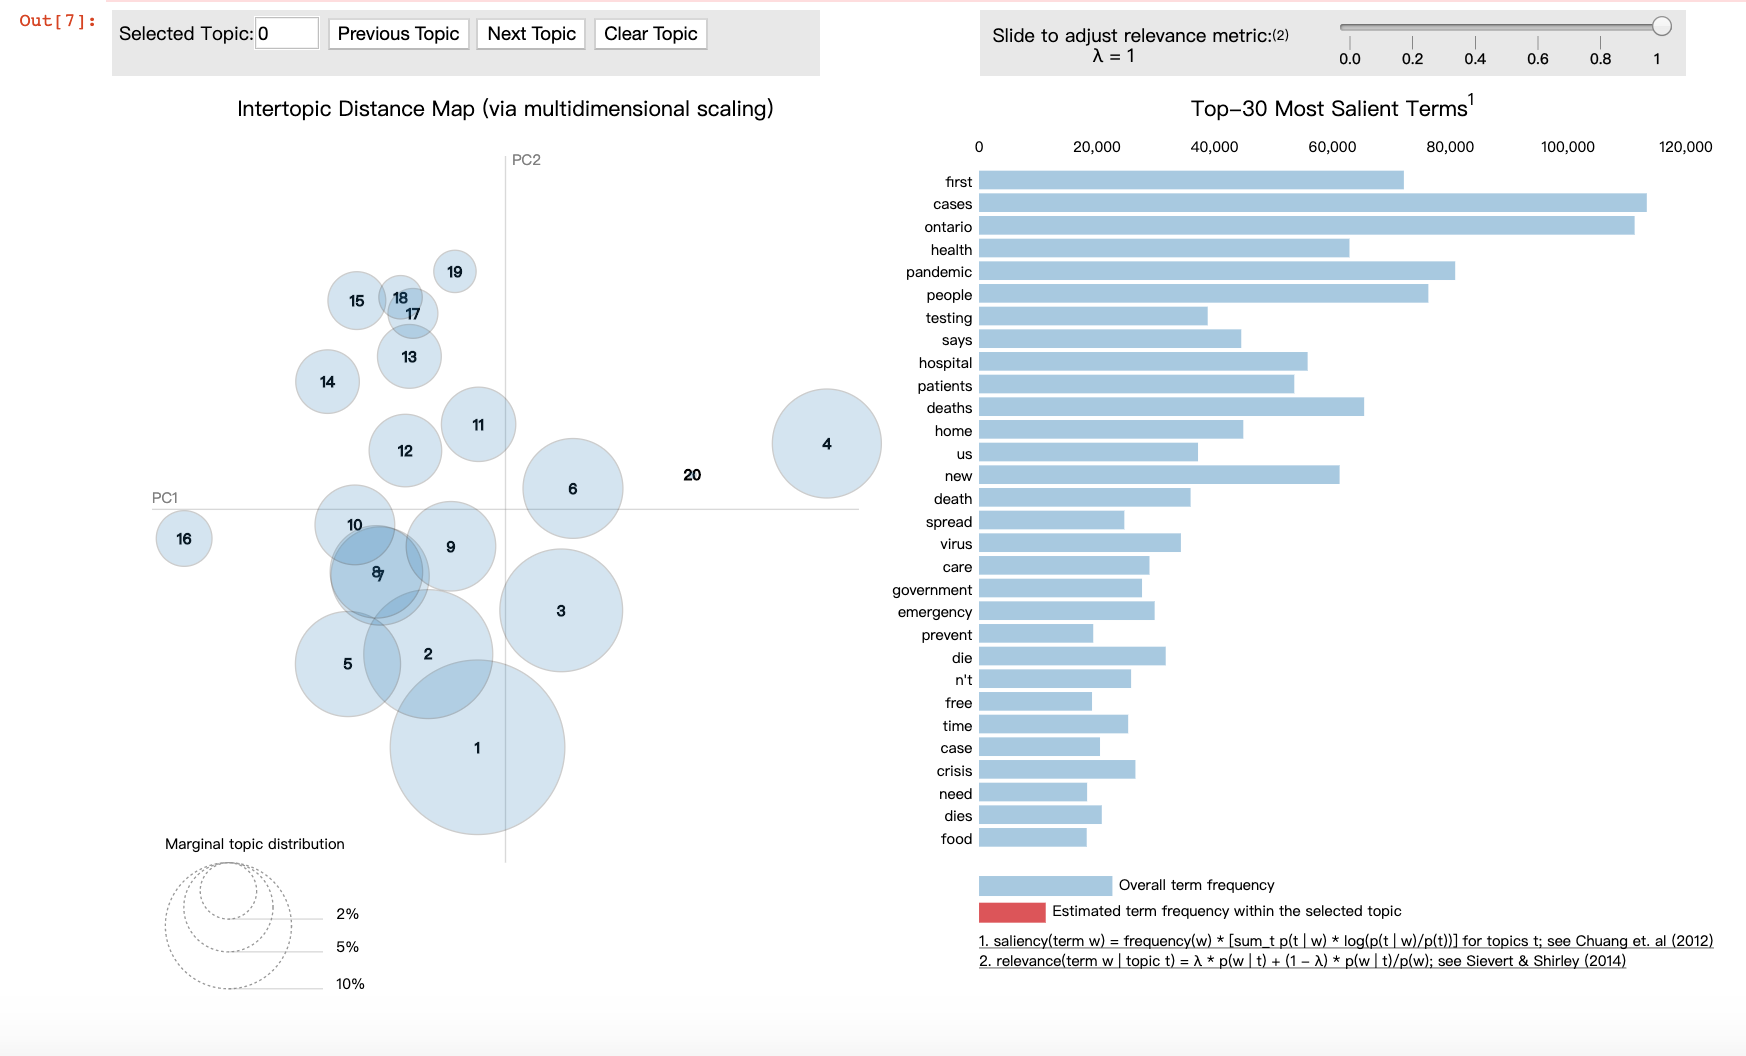

***Find the dominant topic and the weight of the topic for each document***

In [15]:
def doc_topics(ldamodel, corpus, texts):
    # Initiate output
    sent_topics = pd.DataFrame()

    # Get dominant topic in each doc
    for i, row in enumerate(ldamodel[corpus]):
        row = row[0] if ldamodel.per_word_topics else row
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ",".join([word for word, prop in wp])
                sent_topics = sent_topics.append(pd.Series([int(topic_num), round(prop_topic,3), topic_keywords]), 
                                                 ignore_index=True)
            else:
                break
    sent_topics.columns = ['dominant_topic', 'contribution_percent', 'topic_keywords']

    # Add original sentences to the output
    contents = pd.Series(texts)
    sent_topics = pd.concat([sent_topics, contents], axis=1)
    return(sent_topics)

titletexts = reddit_submission.Title.values.tolist()
df_dominant_topic = doc_topics(ldamodel=title_lda_model, corpus=corpus, texts=titletexts).reset_index()

df_dominant_topic.columns = ['doc_no', 'dominant_topic', 'contribution_percent', 'keywords', 'title']
df_dominant_topic.head(5)

,doc_no,dominant_topic,contribution_percent,keywords,title
0,0,18.0,0.362,"first,death,outbreak,state,u.s,reported,concer...",First COVID-19 death in the U.S. happens in Wa...
1,1,0.0,0.246,"us,emergency,n't,news,trump,sees,game,conferen...",Washington state sees 1st COVID-19 death in US...
2,2,8.0,0.192,"cases,ontario,deaths,new,reports,world,start,v...",COVID-19: How I'm investing through this uncer...
3,3,8.0,0.176,"cases,ontario,deaths,new,reports,world,start,v...",COVID-19 Versus the Market
4,4,8.0,0.163,"cases,ontario,deaths,new,reports,world,start,v...",How does COVID-19 affect students on rotation?


In [18]:
df_dominant_topic.to_csv("sub_dominant.csv", index=False)

***Find the most representative sentence in each topic***

In [21]:
pd.options.display.max_colwidth = 150
sent_topics_sorted = pd.DataFrame()
domin_sent = df_dominant_topic.groupby('dominant_topic')

for i, sen in domin_sent:
    sent_topics_sorted = pd.concat([sent_topics_sorted, 
                                        sen.sort_values(['contribution_percent'], ascending=False).head(1)], 
                                        axis=0)
sent_topics_sorted.reset_index(drop=True, inplace=True)
sent_topics_sorted.columns = ['doc_no','topic_no', "contri_prob", "keywords", "repre_text"]
sent_topics_sorted.head(20)

,doc_no,topic_no,contri_prob,keywords,repre_text
0,4633,0.0,0.435,"us,emergency,n't,news,trump,sees,game,conference,declares,april","@mitchellvii: DEMOCRATS: If you aren't a climate scientist, you can't disagree with climate change. If you aren't a women, you can't disagree with..."
1,407074,1.0,0.560,"buying,—,next,fears,school,panic,march,due,pay,move","@ABC: RT @ABCPolitics: 15 states, 1 U.S. territory postpone primaries amid COVID-19 threat: — Alaska — Connecticut — Delaware — Georgia — Hawaii —..."
2,214082,2.0,0.314,"says,china,live,elderly,1st,report,updates,possible,travel,iran","5G started November 1st and was developed from China in China and was first used in China, COVID-19 AKA Coronavirus had its first case in China on..."
3,31,3.0,0.417,"hospital,patients,home,die,today,making,died,must,nursing,found","found on twitter, from the kirkland nursing home where a woman died of covid-19 today"
4,403348,4.0,0.313,"testing,flu,negative,tests,amid,top,ford,centres,low,daily","@mitchellvii: MYTH: ""COVID-19 is more contagious and deadly than flu."" 2017-18, flu infected 51 million. If COVID-19 ""as"" contagious as flu: CFR =..."
5,440655,5.0,0.352,"health,‘,map,national,post,affected,real,official,positive,test","‘Desperate Housewives’, ‘Young Sheldon’, ‘Jessie’ &amp; ‘Barry’ Casts Reunite For Livestream ‘Stars In The House’ COVID-19 Fundraisers"
6,280068,6.0,0.317,"case,2,weeks,quarantine,might,ready,clinical,affect,positive,test","Is it a red flag my BF is choosing to COVID-19 isolate 2 weeks on 2, 2 weeks off out of a different city in a different province? When he is here ..."
7,23,7.0,0.250,"spread,prevent,anything,worried,centres,parents,face,masks,help,due","/u/turnofftunein on Are you worried with Coronavirus(COVID-19)? If so, how is the new virus hitting you and are you doing anything to prevent spre..."
8,403844,8.0,0.558,"cases,ontario,deaths,new,reports,world,start,vaccine,3,drug","@NBCNews: RT @NBCNewYork: #BREAKING New York has released its latest COVID-19 numbers, as of 12:25 p.m: Total cases in New York: 83,712 New cases:..."
9,133640,9.0,0.309,"care,dies,facility,man,anyone,center,50,brampton,long-term,staff",I am a construction worker. I am the man that builds your hospitals. I am the man that provides for my family. I am the man that can not afford to...


In [25]:
sent_topics_sorted.to_csv("sub_representative.csv", index=False)

***Find the number of docs and overall percentages per topic***

In [28]:
# Number of Documents for Each Topic
topic_counts = df_dominant_topic['dominant_topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 3)
topic_no_keywords = sent_topics_sorted[['topic_no', 'keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_no_keywords, topic_counts, topic_contribution], axis=1)

df_dominant_topics.columns = ['dominant_topic', 'keywords', 'num_docs', 'per_docs']
df_dominant_topics

,dominant_topic,keywords,num_docs,per_docs
0.0,0.0,"us,emergency,n't,news,trump,sees,game,conference,declares,april",4220.0,0.007
1.0,1.0,"buying,—,next,fears,school,panic,march,due,pay,move",687.0,0.001
2.0,2.0,"says,china,live,elderly,1st,report,updates,possible,travel,iran",1591.0,0.003
3.0,3.0,"hospital,patients,home,die,today,making,died,must,nursing,found",7576.0,0.013
4.0,4.0,"testing,flu,negative,tests,amid,top,ford,centres,low,daily",527.0,0.001
5.0,5.0,"health,‘,map,national,post,affected,real,official,positive,test",1739.0,0.003
6.0,6.0,"case,2,weeks,quarantine,might,ready,clinical,affect,positive,test",1290.0,0.002
7.0,7.0,"spread,prevent,anything,worried,centres,parents,face,masks,help,due",1148.0,0.002
8.0,8.0,"cases,ontario,deaths,new,reports,world,start,vaccine,3,drug",458699.0,0.809
9.0,9.0,"care,dies,facility,man,anyone,center,50,brampton,long-term,staff",1456.0,0.003


In [29]:
df_dominant_topics.to_csv("submis_topic_num_per.csv", index=False)

***Time series analysis for topics***

In [33]:
pd.options.display.max_colwidth = 80
title_time = reddit_submission[['Month', 'Hour', 'Weekday']]
df_sub_topics_time = pd.concat([df_dominant_topic, title_time], axis=1)
df_sub_topics_time.head(3)

,doc_no,dominant_topic,contribution_percent,keywords,title,Month,Hour,Weekday
0,0,18.0,0.362,"first,death,outbreak,state,u.s,reported,concerns,washington,eye,operation",First COVID-19 death in the U.S. happens in Washington state,2,16,5
1,1,0.0,0.246,"us,emergency,n't,news,trump,sees,game,conference,declares,april","Washington state sees 1st COVID-19 death in US, declares emergency",2,16,5
2,2,8.0,0.192,"cases,ontario,deaths,new,reports,world,start,vaccine,3,drug",COVID-19: How I'm investing through this uncertainty,2,16,5


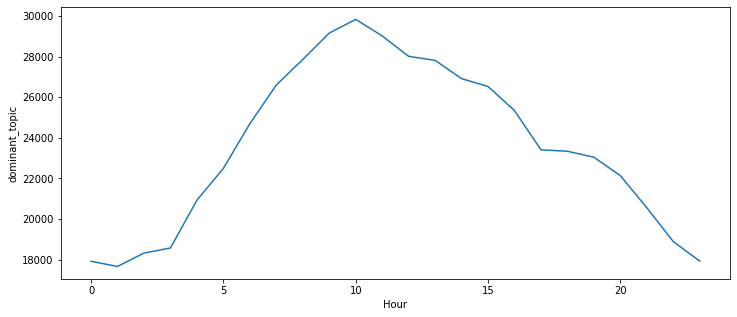

In [43]:
plt.figure(figsize=(12,5))
grp_topic=df_sub_topics_time.groupby('Hour')['dominant_topic'].count().reset_index()
sp1=sns.lineplot(
    x='Hour',
    y='dominant_topic',
    data=grp_topic)
sp1

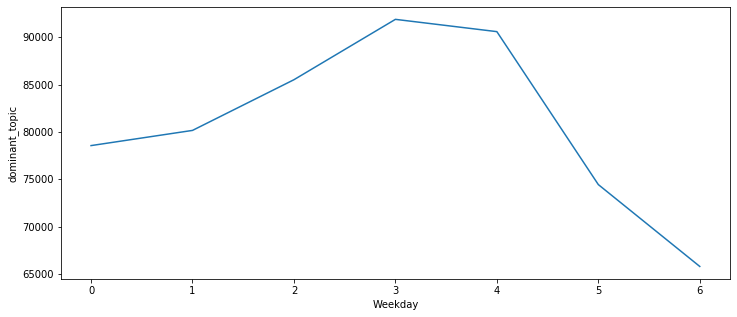

In [44]:
plt.figure(figsize=(12,5))
grp_topic=df_sub_topics_time.groupby('Weekday')['dominant_topic'].count().reset_index()
sp2=sns.lineplot(
    x='Weekday',
    y='dominant_topic',
    data=grp_topic)
sp2

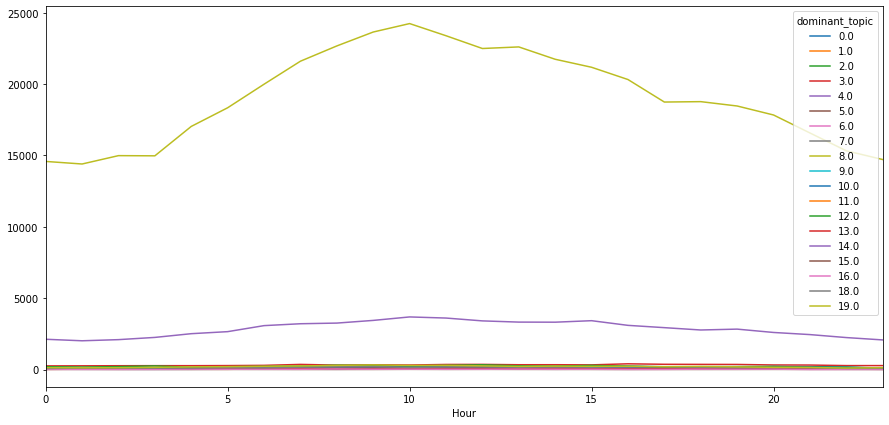

In [47]:
fig, ax = plt.subplots(figsize=(15,7))
df_sub_topics_time.groupby(["Hour","dominant_topic"]).count()['doc_no'].unstack().plot(ax=ax)

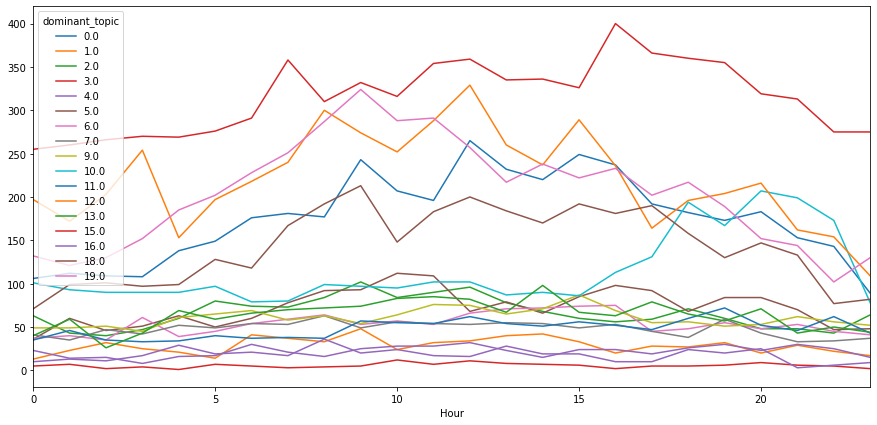

In [50]:
a = df_sub_topics_time[(df_sub_topics_time['dominant_topic']!=8.0) & (df_sub_topics_time['dominant_topic']!=14.0)]
fig, ax = plt.subplots(figsize=(15,7))
a.groupby(["Hour","dominant_topic"]).count()['doc_no'].unstack().plot(ax=ax)

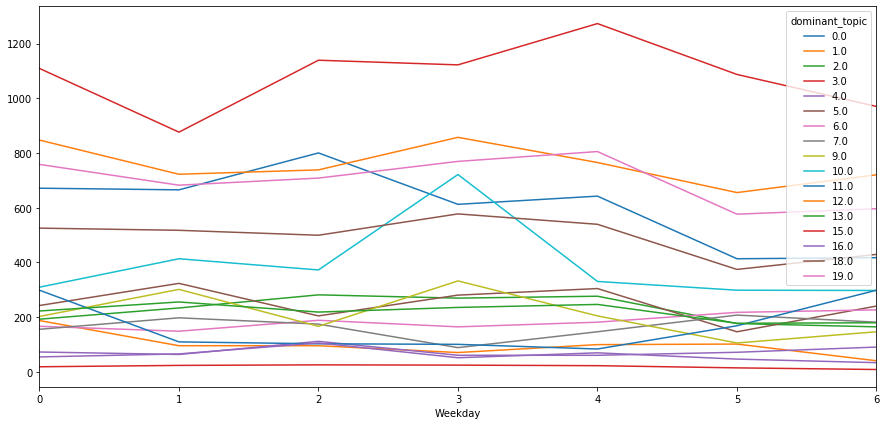

In [51]:
fig, ax = plt.subplots(figsize=(15,7))
a.groupby(["Weekday","dominant_topic"]).count()['doc_no'].unstack().plot(ax=ax)

### Submission - Coronavirus subreddit data

In [66]:
# convert text to lower case 
title = sub_covid_submiss["Title"].str.lower()

# words Tokenization
title = title.apply(word_tokenize)

# remove punctuation
punctuations = list(string.punctuation)
punctuations.append('，')
punctuations.append('“')
punctuations.append('”')
title = title.apply(lambda x: 
            [i.strip("".join(punctuations)) for i in x if i not in punctuations])

# remove stop words 
stop_words=set(stopwords.words("english"))
newStopWords= ["covid-19",'covid','19','coronavirus','2020','co','000','https','could',
               'year','20','03',"’","de","", "amp"]
stop_words.update(newStopWords)
title = title.apply(lambda x: [item for item in x if item not in stop_words])
title

0                             [waffle, house, employee, tests, positive, north, atlanta]
1                                         [5th, person, new, hampshire, tests, positive]
2                           [college, sdsu, transitioning, fully, online, due, concerns]
3        [4, new, cases, reported, hyogo, prefecture, including, physician, 70, worki...
4        [guidance, vdh, case, detected, community, consider, classroom, spacing, stu...
                                              ...                                       
18960                  [congressman, josh, harder, helping, delivering, meals, pandemic]
18961    [ministries, resume, work, relief, industries, farmers, exclusive, details, ...
18962    [oc, 3d, interactive, visualization, map, confirmed, cases, realtime, animat...
18963    [oc, 3d, interactive, visualization, map, confirmed, cases, realtime, animat...
18964    [top, conservatives, voice, concerns, restrictions, religious, gatherings, due]
Name: Title, Length: 

In [67]:
# Create Dictionary
dictionary = gensim.corpora.Dictionary(title)
# Filter out tokens that appear in less than 1000 documents (absolute number) or more than 0.9 documents (percents of total corpus size).
#after the above two steps, keep only the first 20000 most frequent tokens.
dictionary.filter_extremes(no_below=100, no_above=0.9, keep_n=20000)
# Term Document Frequency
subcorpus = [dictionary.doc2bow(text) for text in title]

In [122]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=subcorpus,
                                           id2word=dictionary,
                                           num_topics=7, 
                                           random_state=0,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.116*"patients" + 0.084*"testing" + 0.064*"us" + 0.055*"test" + 0.049*"study" + 0.044*"lockdown" + 0.033*"york" + 0.029*"reported" + 0.029*"live" + 0.028*"rate"
Topic: 1 
Words: 0.110*"people" + 0.068*"workers" + 0.058*"virus" + 0.042*"state" + 0.042*"n't" + 0.039*"use" + 0.038*"care" + 0.037*"city" + 0.037*"risk" + 0.033*"researchers"
Topic: 2 
Words: 0.129*"positive" + 0.090*"death" + 0.072*"tests" + 0.067*"fight" + 0.064*"‘" + 0.059*"first" + 0.056*"hospital" + 0.055*"uk" + 0.049*"tested" + 0.038*"symptoms"
Topic: 3 
Words: 0.156*"cases" + 0.096*"deaths" + 0.065*"says" + 0.063*"india" + 0.057*"health" + 0.044*"may" + 0.035*"data" + 0.031*"confirmed" + 0.030*"update" + 0.027*"research"
Topic: 4 
Words: 0.196*"new" + 0.056*"vaccine" + 0.055*"home" + 0.054*"total" + 0.052*"hydroxychloroquine" + 0.052*"due" + 0.052*"april" + 0.038*"toll" + 0.037*"day" + 0.034*"country"
Topic: 5 
Words: 0.070*"china" + 0.064*"help" + 0.047*"doctor" + 0.047*"treatment" + 0.040*"amid" + 0

In [74]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(subcorpus))

# Compute Coherence Score
coherence_model = CoherenceModel(model=lda_model, texts=title, 
                                           dictionary=dictionary, coherence='c_v')
coherence_ldamodel = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence_ldamodel)


Perplexity:  -5.343400851927563

Coherence Score:  0.28485769184274456


In [123]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, subcorpus, dictionary)
vis

/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.434886  0.028963       1        1  21.294291
0      0.176944  0.161045       2        1  16.034061
5      0.085272  0.022185       3        1  15.562055
2      0.059837 -0.436701       4        1  13.944270
4      0.053137  0.082685       5        1  12.070397
1      0.037871  0.052979       6        1  11.633729
6      0.021825  0.088844       7        1   9.461195, topic_info=    Category         Freq      Term        Total  loglift  logprob
6    Default  2027.000000     cases  2027.000000  30.0000  30.0000
2    Default  1441.000000       new  1441.000000  29.0000  29.0000
0    Default  1097.000000  positive  1097.000000  28.0000  28.0000
45   Default  1129.000000  patients  1129.000000  27.0000  27.0000
220  Default  1246.000000    deaths  1246.000000  26.0000  26.0000
..       ...          ...       ...          ...      ...      ...
57    Topic7     0.138260     close    43.118713  -3.3846 -10.6376
195   Topic7     0.139321    google   257.113312  -5.1625 -10.6300
106   Topic7     0.139150    around   144.217667  -4.5856 -10.6312
118   Topic7     0.138807    united   153.927521  -4.6532 -10.6337
83    Topic7     0.138648   control   200.469025  -4.9185 -10.6348

[251 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
128       5  0.995310      1
28        1  0.990659     10
35        2  0.996581      2
14        6  0.993706      3
78        5  0.986012      6
...     ...       ...    ...
189       2  0.996597  wuhan
123       2  0.997722   york
48        7  0.988607      –
160       5  0.993521      —
145       4  0.998121      ‘

[206 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 6, 3, 5, 2, 7])

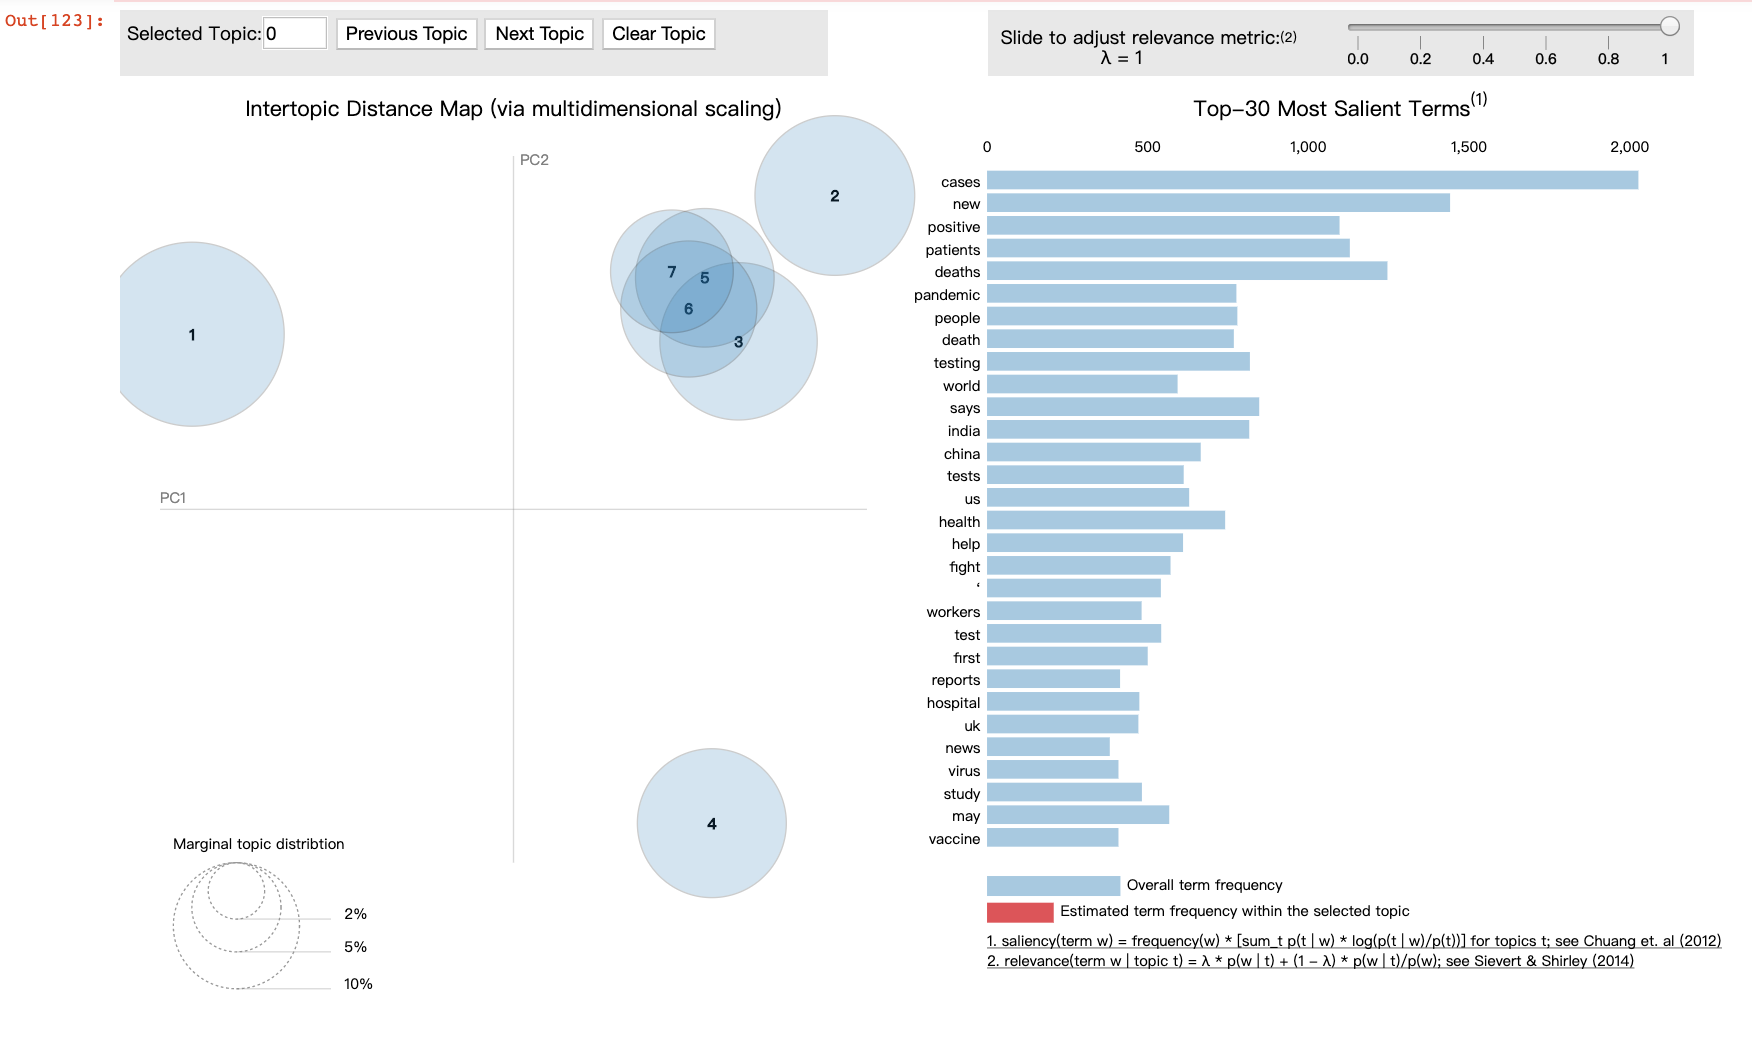

In [124]:
# assign topics to each document
texts = sub_covid_submiss.Title.values.tolist()
sub_domin_topic = doc_topics(ldamodel=lda_model, corpus=subcorpus, texts=texts).reset_index()

sub_domin_topic.columns = ['doc_no', 'domin_topic', 'contri_perc', 'keywords', 'title']
sub_domin_topic.head(5)

,doc_no,domin_topic,contri_perc,keywords,title
0,0,2.0,0.232,"positive,death,tests,fight,‘,first,hospital,uk,tested,symptoms",Waffle House Employee Tests Positive for COVID-19 in North Atlanta
1,1,2.0,0.220,"positive,death,tests,fight,‘,first,hospital,uk,tested,symptoms",5th person in New Hampshire tests positive for COVID-19
2,2,5.0,0.195,"china,help,doctor,treatment,amid,response,outbreak,doctors,get,crisis","My college, SDSU, will be transitioning fully online due to COVID-19 concerns."
3,3,0.0,0.328,"patients,testing,us,test,study,lockdown,york,reported,live,rate",4 new COVID-19 cases reported in Hyogo prefecture. Including a Physician in ...
4,4,5.0,0.185,"china,help,doctor,treatment,amid,response,outbreak,doctors,get,crisis",Guidance from VDH in case COVID-19 is detected in a community: Consider clas...


In [126]:
# find the most representative sentences in each topic
topics_sorted = pd.DataFrame()
domin_doc = sub_domin_topic.groupby('domin_topic')

for i, submission in domin_doc:
    topics_sorted = pd.concat([topics_sorted, 
                                        submission.sort_values(['contri_perc'], ascending=False).head(1)], 
                                        axis=0)
topics_sorted.reset_index(drop=True, inplace=True)
topics_sorted.columns = ['doc_no','topic_no', "contri_prob", "keywords", "repre_text"]
topics_sorted.head(7)

,doc_no,topic_no,contri_prob,keywords,repre_text
0,6900,0.0,0.340,"patients,testing,us,test,study,lockdown,york,reported,live,rate",High dose IV Vitamin C improves symptoms and eliminated mortality in a study...
1,55,1.0,0.419,"people,workers,virus,state,n't,use,care,city,risk,researchers",Why not just move on to testing whether people have had COVID-19 and are now...
2,5,2.0,0.452,"positive,death,tests,fight,‘,first,hospital,uk,tested,symptoms",An additional case of COVID-19 confirmed in Hyogo prefecture by a 70 year ol...
3,12873,3.0,0.447,"cases,deaths,says,india,health,may,data,confirmed,update,research","Ohio Department of Health data show 1,933 confirmed COVID-19 cases and 39 de..."
4,18474,4.0,0.374,"new,vaccine,home,total,hydroxychloroquine,due,april,toll,day,country","COVID-19 UPDATE: Europe leads in all statistics (Total cases-814,40); (New c..."
5,18493,5.0,0.434,"china,help,doctor,treatment,amid,response,outbreak,doctors,get,crisis","If you're a parent of pre-k to high school students, can you fill out the su..."
6,3041,6.0,0.308,"pandemic,world,reports,news,clinical,disease,contact,states,report,treat",Can a face mask stop coronavirus? Covid-19 facts checked | World news


In [127]:
# Number of Documents for Each Topic
tpc_cnts = sub_domin_topic['domin_topic'].value_counts()

# Percentage of Documents for Each Topic
tpc_ctr = round(tpc_cnts/tpc_cnts.sum(), 3)
tpc_no_key = topics_sorted[['topic_no', 'keywords']]

# Concatenate Column wise
sub_domin_tpcs = pd.concat([tpc_no_key, tpc_cnts, tpc_ctr], axis=1)

sub_domin_tpcs.columns = ['domin_topic', 'keywords', 'num_docs', 'per_docs']
sub_domin_tpcs

,domin_topic,keywords,num_docs,per_docs
0.0,0.0,"patients,testing,us,test,study,lockdown,york,reported,live,rate",3199,0.169
1.0,1.0,"people,workers,virus,state,n't,use,care,city,risk,researchers",502,0.026
2.0,2.0,"positive,death,tests,fight,‘,first,hospital,uk,tested,symptoms",1291,0.068
3.0,3.0,"cases,deaths,says,india,health,may,data,confirmed,update,research",10254,0.541
4.0,4.0,"new,vaccine,home,total,hydroxychloroquine,due,april,toll,day,country",430,0.023
5.0,5.0,"china,help,doctor,treatment,amid,response,outbreak,doctors,get,crisis",3047,0.161
6.0,6.0,"pandemic,world,reports,news,clinical,disease,contact,states,report,treat",242,0.013


In [111]:
tpc_nocoms = pd.concat([sub_covid_submiss['TotalComments'], sub_domin_tpcs], axis=1)
tpc_nocoms.head(2)

,TotalComments,domin_topic,keywords,num_docs,per_docs
0.0,42,0.0,"patients,positive,testing,us,tests,study,reports,lockdown,shows,severe",3258.0,0.172
1.0,0,1.0,"help,workers,virus,update,symptoms,rate,report,researchers,today,recovered",1863.0,0.098


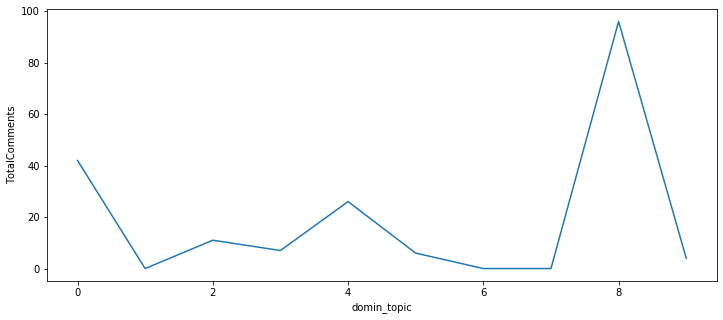

In [112]:
# find the number of comments per topic
plt.figure(figsize=(12,5))
grp_tpc_com=tpc_nocoms.groupby('domin_topic')['TotalComments'].sum().reset_index()
sp3=sns.lineplot(
    x='domin_topic',
    y='TotalComments',
    data=grp_tpc_com)
sp3

###  Comment data

In [11]:
# comments word tokenization
comments = reddit_comments["Comment"].str.lower()
comments = comments.apply(word_tokenize)
comments = comments.apply(lambda x: [i.strip("".join(punctuations)) for i in x if i not in punctuations])
comments = comments.apply(lambda x: [item for item in x if item not in stop_words])
comments

0          [ebola, n't, start, one, world, largest, manuf...
1          [sure, vaccine, 18-24, months, away, fact, cur...
2          [also, regular, n95, masks, n't, cover, eyes, ...
3                                      [conversion, therapy]
4          [two, completely, different, things, mortality...
                                 ...                        
1069743    [us, struggling, working, flatten, curve, stop...
1069744    [beans, legumes, nutritious, filling, used, va...
1069745     [countries, n't, tests, ca, n't, confirm, cases]
1069746    [sudden, evaporation, postal, service, would, ...
1069747    [italy, france, germany, uk, good, ol, usa, co...
Name: Comment, Length: 1069748, dtype: object

In [24]:
# build LDA model
comments_dictionary = gensim.corpora.Dictionary(comments)
comments_dictionary.filter_extremes(no_below=50000, no_above=0.5, keep_n=50000)
com_corpus = [comments_dictionary.doc2bow(text) for text in comments]

com_lda_model = gensim.models.ldamodel.LdaModel(corpus=com_corpus,
                                           id2word=comments_dictionary,
                                           num_topics=15, 
                                           random_state=123,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

for idx, topic in com_lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.236*"go" + 0.178*"back" + 0.162*"day" + 0.159*"due" + 0.146*"place" + 0.119*"last" + 0.000*"new" + 0.000*"keep" + 0.000*"days" + 0.000*"two"
Topic: 1 
Words: 0.394*"may" + 0.187*"cases" + 0.148*"symptoms" + 0.147*"world" + 0.124*"days" + 0.000*"hospital" + 0.000*"keep" + 0.000*"new" + 0.000*"risk" + 0.000*"around"
Topic: 2 
Words: 0.256*"health" + 0.187*"care" + 0.132*"questions" + 0.130*"things" + 0.123*"use" + 0.096*"performed" + 0.077*"two" + 0.000*"hospital" + 0.000*"risk" + 0.000*"keep"
Topic: 3 
Words: 0.211*"n't" + 0.128*"would" + 0.086*"one" + 0.078*"work" + 0.072*"even" + 0.070*"need" + 0.065*"know" + 0.052*"still" + 0.050*"really" + 0.046*"home"
Topic: 4 
Words: 0.519*"disease" + 0.481*"virus" + 0.000*"hospital" + 0.000*"risk" + 0.000*"spread" + 0.000*"work" + 0.000*"keep" + 0.000*"need" + 0.000*"go" + 0.000*"around"
Topic: 5 
Words: 0.185*"please" + 0.122*"related" + 0.109*"post" + 0.095*"contact" + 0.075*"new" + 0.067*"subreddit" + 0.060*"concerns" + 0.06

In [31]:
# compute model Perplexity and Coherence score
print('Perplexity: ', com_lda_model.log_perplexity(com_corpus)) 
coherence_com_ldamodel = CoherenceModel(model=com_lda_model, texts=comments, 
                                           dictionary=comments_dictionary, coherence='c_v').get_coherence()
print('\nCoherence Score: ', coherence_com_ldamodel)


Perplexity:  -4.251177248714867

Coherence Score:  0.4883383514561971


In [32]:
# Topics visualization
pyLDAvis.enable_notebook()
vis1 = pyLDAvis.gensim.prepare(com_lda_model, com_corpus, comments_dictionary)
vis1

/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.298993  0.281944       1        1  20.518614
9      0.129861 -0.069600       2        1  10.090453
5      0.023614 -0.250001       3        1   9.258558
7      0.018088 -0.065245       4        1   8.422935
8      0.337608  0.290840       5        1   7.312873
12     0.008527 -0.041678       6        1   7.156239
2      0.056007 -0.026058       7        1   5.962531
0      0.005300 -0.021072       8        1   5.278300
1     -0.000142 -0.006132       9        1   4.727055
13    -0.034853 -0.025497      10        1   4.498240
14    -0.024448 -0.007561      11        1   4.253438
11    -0.032119 -0.019811      12        1   3.784929
10    -0.039858 -0.014851      13        1   3.502858
6     -0.088187 -0.011820      14        1   2.822137
4     -0.060406 -0.013459      15        1   2.410849, topic_info=   Category           Freq    Term          Total  loglift  logprob
4   Default  444456.000000  people  444456.000000  30.0000  30.0000
60  Default  280731.000000      gt  280731.000000  29.0000  29.0000
11  Default  256444.000000     get  256444.000000  28.0000  28.0000
2   Default  430915.000000     n't  430915.000000  27.0000  27.0000
50  Default  185454.000000     may  185454.000000  26.0000  26.0000
..      ...            ...     ...            ...      ...      ...
58  Topic15       0.049886  health  152121.453125 -11.2052 -15.3857
50  Topic15       0.049886     may  185454.671875 -11.4034 -15.3857
43  Topic15       0.049886   think  143820.812500 -11.1491 -15.3857
23  Topic15       0.049886    home   93842.031250 -10.7222 -15.3857
30  Topic15       0.049886  really  101701.953125 -10.8026 -15.3857

[739 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
17       13  0.999983        2
74        6  0.999993   action
18       10  0.999995  already
0         2  0.999993     also
9        10  0.999988   around
...     ...       ...      ...
68        4  0.999980    weeks
34        2  0.999987     well
35        1  0.999995     work
5         9  0.999992    world
57        1  0.999998    would

[93 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 10, 6, 8, 9, 13, 3, 1, 2, 14, 15, 12, 11, 7, 5])

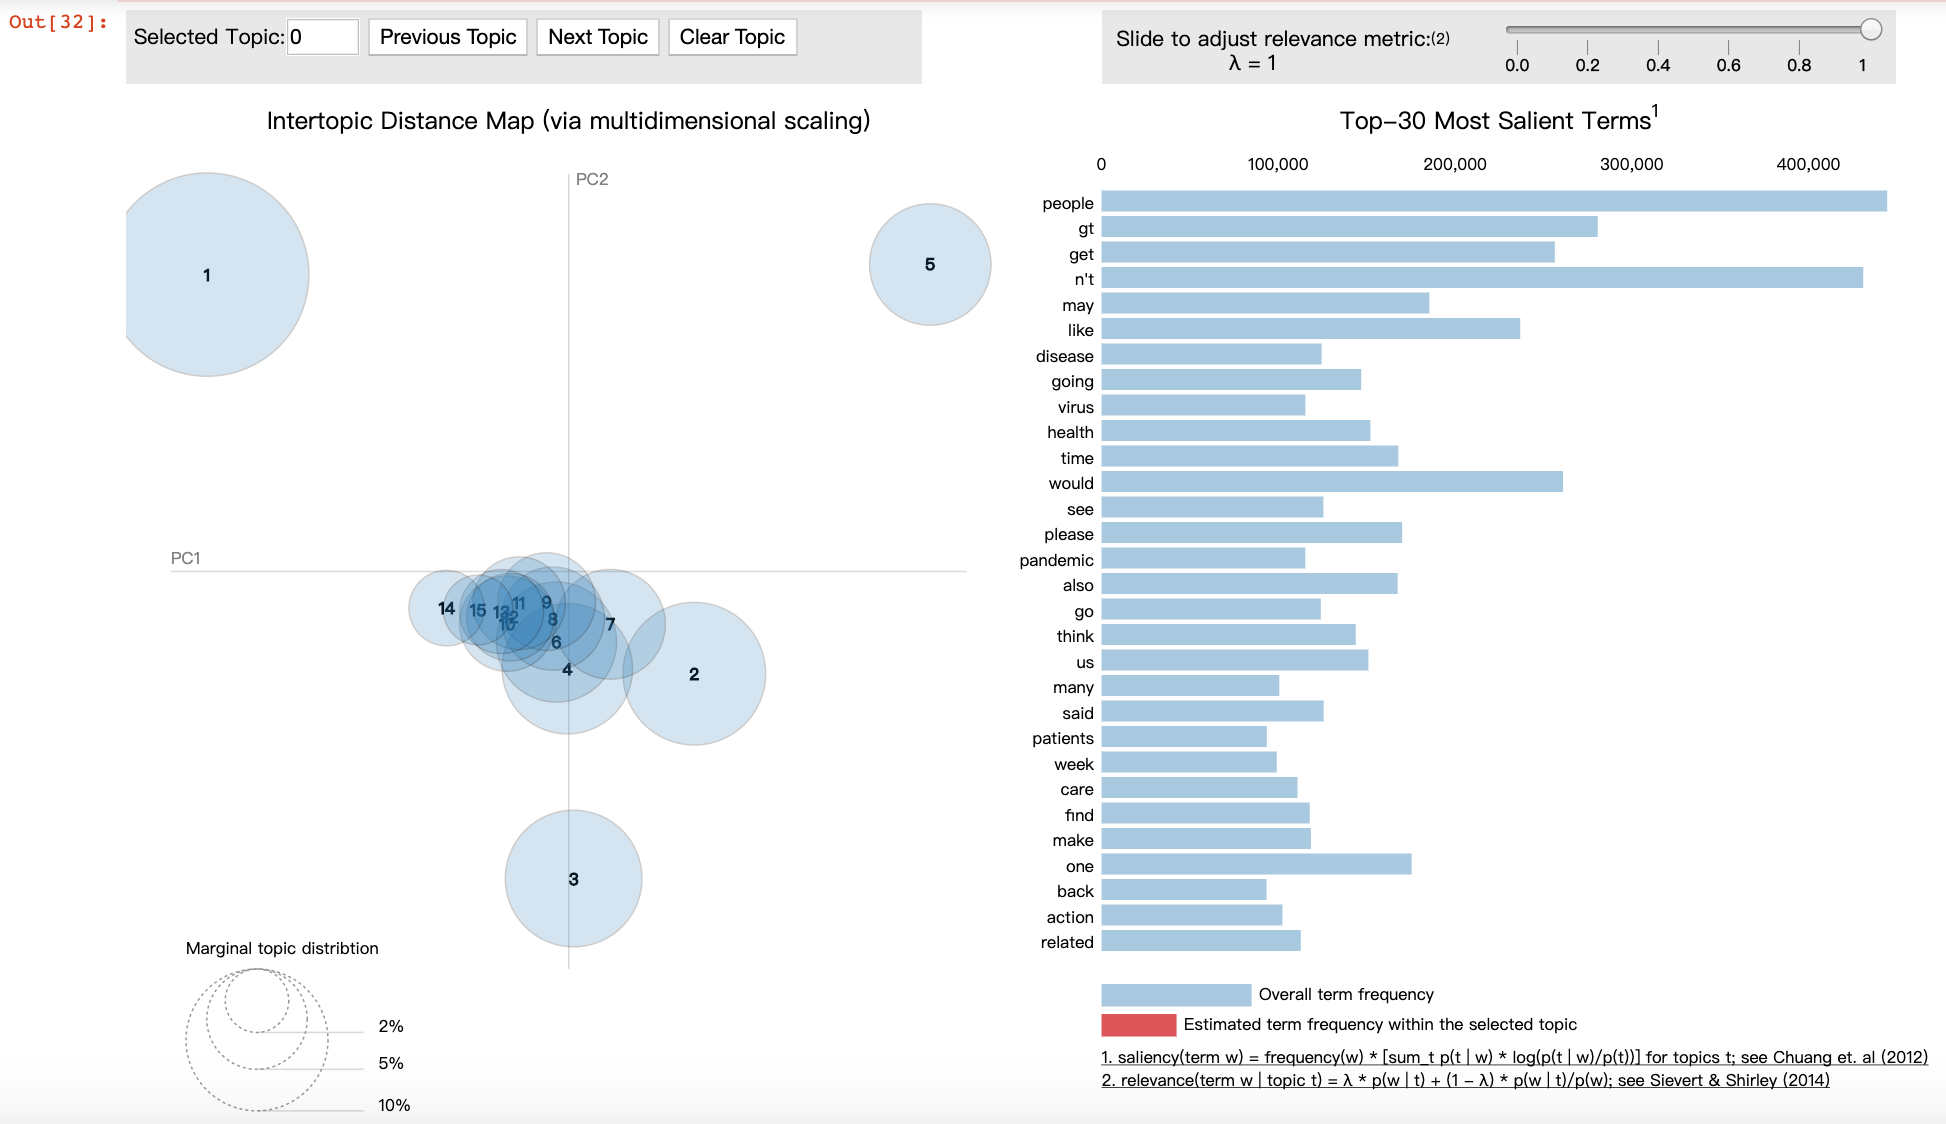

In [ ]:
pd.options.display.max_colwidth = 80
comtexts = reddit_comments.Comment.values.tolist()
df_domin_topic = doc_topics(ldamodel=com_lda_model, corpus=com_corpus, texts=comtexts).reset_index()
df_domin_topic.columns = ['doc_no', 'dominant_topic', 'contribution_percent', 'keywords', 'comment']
df_domin_topic.head(3)

In [ ]:
com_topics_sorted = pd.DataFrame()
domin_com = df_domin_topic.groupby('dominant_topic')

for i, com in domin_com:
    com_topics_sorted = pd.concat([com_topics_sorted, com.sort_values(['contribution_percent'], ascending=False).head(1)], axis=0)

com_topics_sorted.reset_index(drop=True, inplace=True)
com_topics_sorted.columns = ['doc_no','topic_no', "contri_prob", "keywords", "repre_text"]
com_topics_sorted.head(15)

In [ ]:
topic_cnts = df_domin_topic['dominant_topic'].value_counts()
topic_ctr = round(topic_cnts/topic_cnts.sum(), 3)
topic_no_key_comm = com_topics_sorted[['topic_no', 'keywords']]

df_domin_topics = pd.concat([topic_no_key_comm, topic_cnts, topic_ctr], axis=1)
df_domin_topics.columns = ['dominant_topic', 'keywords', 'num_docs', 'per_docs']
df_domin_topics

## Aggregated Activity Data (time series) 

In [93]:
with open("comagg60d.json") as json_file:
    comagg = json.load(json_file)

comlist = comagg["aggs"]["created_utc"]
df_comagg = pd.DataFrame.from_dict(comlist, orient='columns')
df_comagg['key'] = pd.to_datetime(df_comagg['key'],unit='s')
df_comagg['month'] = df_comagg['key'].dt.month
df_comagg['hour'] = df_comagg['key'].dt.hour
df_comagg['weekday'] = df_comagg['key'].dt.weekday

df_comagg.to_csv("comagg60d.csv", index=False)

In [94]:
with open("submissionagg60d.json") as json_file:
    subagg = json.load(json_file)

sublist = subagg["aggs"]["created_utc"]
df_subagg = pd.DataFrame.from_dict(sublist, orient='columns')
df_subagg['key'] = pd.to_datetime(df_subagg['key'],unit='s')
df_subagg['month'] = df_subagg['key'].dt.month
df_subagg['hour'] = df_subagg['key'].dt.hour
df_subagg['weekday'] = df_subagg['key'].dt.weekday

df_subagg.to_csv("subagg60d.csv", index=False)

In [97]:
with open("subredditagg60d.json") as json_file:
    subredagg = json.load(json_file)

subredlist = subredagg["aggs"]["subreddit"]
df_subredagg = pd.DataFrame.from_dict(subredlist, orient='columns')

df_subredagg.to_csv("subredagg60d.csv", index=False)